
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import scipy.stats as stats


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")

In [2]:
iowa = pd.read_csv("C:/Users/nonob/Downloads/Iowa_Liquor_sales_sample_10pct.csv", sep = ',')

In [3]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [4]:
iowa.shape

(270955, 18)

In [5]:
iowa['Date'] = pd.to_datetime(iowa['Date'])  # converting date to pd date and time format

In [6]:
iowa['Date'].max()

Timestamp('2016-03-31 00:00:00')

In [7]:
iowa['Date'].min()

Timestamp('2015-01-05 00:00:00')

In [8]:
nul_l = iowa['County'].isnull()

In [9]:
iowa.loc[nul_l, 'County'] = 'Shelby' # replacing counties with null values with their real name

In [10]:
df1 = iowa.loc[(iowa['Date'] >= '2015-01-05') & (iowa['Date'] < '2016-01-01')].copy() # split the main df and made a copy for 2015 subset

In [11]:
df1.shape  # verify the dimension of the dataset 2015

(218594, 18)

In [12]:
df1.head(2) 

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [13]:
df2 = iowa.loc[(iowa['Date'] > '2015-12-31') & (iowa['Date'] <= '2016-03-31')].copy()  # copy for 2016 subset

In [14]:
df2.shape # the dataframe dimension 2016

(52361, 18)

In [15]:
df2.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [16]:
df1.isnull().sum()  # 2015 subset total variables with null values

Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            117
County                     0
Category                  67
Category Name            129
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [17]:
df2.isnull().sum()  # 2016 subset total variables with null values

Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            960
County                     0
Category                   1
Category Name            503
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [18]:
df1.info()  # descriptive summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218594 entries, 0 to 270954
Data columns (total 18 columns):
Date                     218594 non-null datetime64[ns]
Store Number             218594 non-null int64
City                     218594 non-null object
Zip Code                 218594 non-null object
County Number            218477 non-null float64
County                   218594 non-null object
Category                 218527 non-null float64
Category Name            218465 non-null object
Vendor Number            218594 non-null int64
Item Number              218594 non-null int64
Item Description         218594 non-null object
Bottle Volume (ml)       218594 non-null int64
State Bottle Cost        218594 non-null object
State Bottle Retail      218594 non-null object
Bottles Sold             218594 non-null int64
Sale (Dollars)           218594 non-null object
Volume Sold (Liters)     218594 non-null float64
Volume Sold (Gallons)    218594 non-null float64
dtypes: datetime64

In [19]:
df2.info()  # descriptive summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52361 entries, 1 to 270944
Data columns (total 18 columns):
Date                     52361 non-null datetime64[ns]
Store Number             52361 non-null int64
City                     52361 non-null object
Zip Code                 52361 non-null object
County Number            51401 non-null float64
County                   52361 non-null object
Category                 52360 non-null float64
Category Name            51858 non-null object
Vendor Number            52361 non-null int64
Item Number              52361 non-null int64
Item Description         52361 non-null object
Bottle Volume (ml)       52361 non-null int64
State Bottle Cost        52361 non-null object
State Bottle Retail      52361 non-null object
Bottles Sold             52361 non-null int64
Sale (Dollars)           52361 non-null object
Volume Sold (Liters)     52361 non-null float64
Volume Sold (Gallons)    52361 non-null float64
dtypes: datetime64[ns](1), float64(4)

In [20]:
df1.columns  # Previewing the column headers

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [21]:
rename_iow = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [22]:
df1.rename(columns=rename_iow, inplace=True)  # Replacing column names to suitable ones
df1.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [23]:
rename_iow2 = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [24]:
df2.rename(columns=rename_iow2, inplace=True)  # Replacing column names to suitable ones
df2.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [25]:
null_mask = df1['TotalSales'] # masking so as to be able to access the variable values and perform string strip

In [26]:
new_null = null_mask.str.strip('$')

In [27]:
new_null = [float(x) for x in new_null]

df1['TotalSales'] = new_null


In [28]:
null_mask = df2['TotalSales']

In [29]:
new_null = null_mask.str.strip('$')

In [30]:
new_null = [float(x) for x in new_null]

df2['TotalSales'] = new_null


In [31]:
null_mask1 = df1['StateBottleRetail']  # formating to floats from string object
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

df1['StateBottleRetail'] = new_null1

In [32]:
null_mask1 = df2['StateBottleRetail']
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

df2['StateBottleRetail'] = new_null1

In [33]:
null_mask2 = df1['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

df1['StateBottleCost'] = new_null2

In [34]:
null_mask2 = df2['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

df2['StateBottleCost'] = new_null2

In [35]:
df1['ZipCode'].unique()  

array(['50674', '50421', '52402', '52501', '50428', '52332', '50265',
       '52577', '52806', '50208', '52807', '52342', '51250', '50401',
       '51351', '52246', '51501', '50111', '52245', '50010', '52632',
       '50125', '50501', '50311', '50317', '50124', '50651', '50129',
       '50021', '52224', '50533', '52060', '51401', '50595', '51104',
       '52404', '52353', '50616', '52057', '50009', '52802', '51503',
       '50703', '52804', '50638', '51106', '52001', '50250', '51461',
       '52641', '52303', '52144', '52761', '50851', '51555', '52240',
       '50511', '50310', '50613', '50263', '50314', '52753', '50701',
       '50140', '52732', '50665', '52601', '712-2', '51455', '51453',
       '52405', '52302', '50131', '50662', '50320', '50423', '52361',
       '50201', '50003', '50315', '52136', '52544', '52556', '51334',
       '50158', '52778', '51601', '52241', '52337', '51105', '50583',
       '50325', '50707', '51040', '52340', '52101', '50220', '52356',
       '52172', '504

In [36]:
dee = df1['ZipCode'] == '712-2'

In [37]:
df1.loc[dee, 'ZipCode'] = str(51529)  # Replacing the wired zip codes with the right one

In [38]:
null_mak = df1['ZipCode']
new_null = [int(x) for x in null_mak]
df1['ZipCode'] = new_null

In [39]:
dee = df2['ZipCode'] == '712-2'
df2.loc[dee, 'ZipCode'] = str(51529)  # Replacing the wired zip codes with the right one
null_mak = df2['ZipCode']
new_null = [int(x) for x in null_mak]
df2['ZipCode'] = new_null

In [40]:
dff_sale = df1['StateBottleRetail'] - df1['StateBottleCost']  # created a new column in my df and assign it the profits made by each vendor
df1['ProfitBottle'] = df1['BottlesSold'] * dff_sale  

In [41]:
dff_sale = df2['StateBottleRetail'] - df2['StateBottleCost']
df2['ProfitBottle'] = df2['BottlesSold'] * dff_sale  

In [42]:
df1 = df1.reset_index(drop = True).copy()  # resets index after subsetting my df into df1 and df2

In [43]:
df1.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,27.0
1,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.2,10.80,12,129.6,21.0,5.55,43.2


In [44]:
df2 = df2.reset_index(drop=True).copy()  # resets index after subsetting my df into df1 and df2

In [45]:
df2.groupby(['Date'])['TotalSales'].max().sort_values(ascending=False).head()

Date
2016-01-15    32184.00
2016-02-29    17820.00
2016-01-07    17820.00
2016-02-25    17378.52
2016-03-22    16542.00
Name: TotalSales, dtype: float64

Text(0,0.5,'Date')

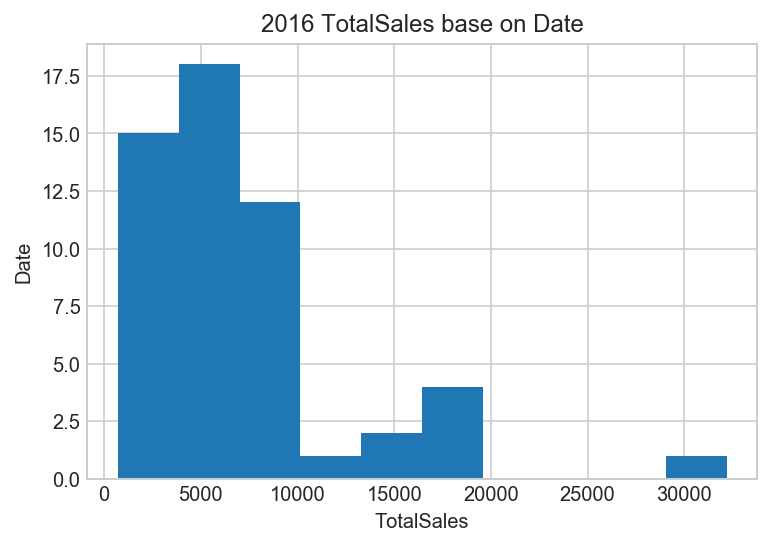

In [46]:
df2.groupby(['Date'])['TotalSales'].max().sort_values(ascending=False).plot('hist', title = '2016 TotalSales base on Date')
plt.xlabel('TotalSales')
plt.ylabel('Date')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df1.sort_values(by='TotalSales', ascending=False).head(2) # Vendors daily sales TotalSales

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
32769,2015-10-01,2633,DES MOINES,50320,77.0,Polk,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,18.38,27.57,1320,36392.40,1320.0,348.71,12130.80
22873,2015-11-18,4677,CORALVILLE,52241,52.0,Johnson,1032080.0,IMPORTED VODKA,35,34425,Grey Goose Vodka,1750,35.42,53.13,552,29327.76,966.0,255.19,9775.92


In [49]:
df1 = df1.drop(['ItemDescription','City','StoreNum', 'ZipCode', 'CountyNum','BottleVolml','Category', 'ItemNum','VolumeSoldGallons'], axis=1)

In [50]:
df1.head() # dropping unnecessary Variables

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2015-11-04,Bremer,APRICOT BRANDIES,55,4.50,6.75,12,81.00,9.00,27.00
1,2015-08-18,Wright,VODKA 80 PROOF,297,7.20,10.80,12,129.60,21.00,43.20
2,2015-04-20,Linn,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,10.50,39.96
3,2015-08-05,Wapello,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,2.25,9.99
4,2015-06-25,Cerro Gordo,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,3.50,15.76


In [51]:
df1.VendorNum.unique()

array([ 55, 297, 205,  85,  65, 380, 434, 971, 115, 260, 395, 192, 285,
       330,  35, 305, 421, 240, 322, 370, 259, 461, 384, 255, 209, 125,
       301, 410, 492, 389, 300, 420, 277, 294, 394, 154, 184, 130, 121,
       163, 229, 208, 308, 267,  86, 306, 359, 381, 100,  10, 112, 239,
       478, 346, 313, 451, 195, 978, 977, 803, 885,  91, 357, 962, 284,
       460, 469, 110, 497, 166, 122, 207, 116, 375, 969, 338, 246, 226,
       287, 250, 399, 295, 107, 315, 418,  80, 198, 206, 391, 390, 373,
       101, 413, 310, 268, 136, 495, 452, 503, 376, 477, 293, 446, 363,
       377, 224, 187, 432], dtype=int64)

In [52]:
sa_AVG = df1.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = False) # vendors with high sales on AVG daily

In [53]:
sa_AVG.sort_values(by='TotalSales', ascending=False)  # vendors with high sales on AVG daily

,VendorNum,TotalSales
58,310,936.360000
49,293,479.280000
22,166,460.740000
30,207,435.341667
78,391,396.668571
51,295,346.215000
100,503,334.152000
103,962,298.921915
54,301,270.498950
72,377,252.000000


In [54]:
sa_AVG2 = df1.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = True) # vendors with low sales on AVG daily

In [55]:
sa_AVG2.head()  # vendors with low sales on AVG daily

,VendorNum,TotalSales
71,376,23.790000
57,308,38.167810
101,803,40.002258
50,294,40.988889
106,977,42.188333


In [56]:
df1.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=False) # Vendor with high Avg profit for 2015

,VendorNum,ProfitBottle
58,310,312.120000
49,293,160.000000
22,166,153.580000
30,207,145.113889
78,391,132.231429
51,295,115.395000
100,503,111.384000
103,962,99.648511
54,301,90.188643
72,377,84.000000


In [57]:
df1['BottlesSold'].count()  # number of bottles sold for the year 2015

218594

In [58]:
df1[df1['BottlesSold'] == 2508]  # County where most bottles were sold in a day for 2015

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
28136,2015-06-15,Linn,VODKA 80 PROOF,55,3.97,5.96,2508,14947.68,2508.0,4990.92


In [59]:
D_avg1 = df1.groupby(['County'], as_index = False)['BottlesSold'].mean().sort_values(by=['BottlesSold'], ascending=True)  # County with least AVG daily bottle sale

In [60]:
D_avg1  # County with least AVG daily bottle sale for 2015

,County,BottlesSold
1,Adams,3.989418
65,Mitchell,4.039168
86,Taylor,4.087336
66,Monona,4.297915
42,Harrison,4.639610
53,Keokuk,4.692857
73,Palo Alto,4.858657
52,Jones,5.003139
21,Clayton,5.081935
25,Davis,5.111765


In [61]:
D_avg2 = df1.groupby(['County'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].mean().sort_values(by=['BottlesSold'], ascending=False)  # County with most AVG daily bottle sale

In [62]:
D_avg2.head()  # Counties with most AVG daily bottle sales for 2015

,County,BottlesSold,TotalSales,ProfitBottle
35,Fremont,14.272727,120.656818,40.311818
24,Dallas,13.330296,228.193754,76.431909
81,Scott,12.511786,152.481619,50.919619
76,Polk,11.986219,161.884558,54.090624
6,Black Hawk,11.795181,130.639050,43.662074


In [63]:
df1.groupby(['County'], as_index = False).sum().sort_values(by=['BottlesSold'], ascending=False).head(5)  # County with most daily bottle sale

,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
76,Polk,10143222,402422.50,604309.28,474031,6402210.51,413994.69,2139175.98
56,Linn,4906100,181803.67,273018.70,202959,2606326.77,181821.59,870999.67
81,Scott,3440221,129524.00,194504.44,167733,2044168.58,133400.75,682628.41
6,Black Hawk,3110691,112759.05,169344.28,142934,1583084.01,108736.43,529097.01
51,Johnson,2762156,109616.75,164610.65,120606,1719917.10,105861.69,574499.31


In [64]:
df1.VendorNum.unique()

array([ 55, 297, 205,  85,  65, 380, 434, 971, 115, 260, 395, 192, 285,
       330,  35, 305, 421, 240, 322, 370, 259, 461, 384, 255, 209, 125,
       301, 410, 492, 389, 300, 420, 277, 294, 394, 154, 184, 130, 121,
       163, 229, 208, 308, 267,  86, 306, 359, 381, 100,  10, 112, 239,
       478, 346, 313, 451, 195, 978, 977, 803, 885,  91, 357, 962, 284,
       460, 469, 110, 497, 166, 122, 207, 116, 375, 969, 338, 246, 226,
       287, 250, 399, 295, 107, 315, 418,  80, 198, 206, 391, 390, 373,
       101, 413, 310, 268, 136, 495, 452, 503, 376, 477, 293, 446, 363,
       377, 224, 187, 432], dtype=int64)

In [65]:
df1.groupby(['VendorNum'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].sum().sort_values(by=['TotalSales'], ascending=False)

,VendorNum,BottlesSold,TotalSales,ProfitBottle
42,260,354920,6.241002e+06,2080900.31
3,65,163628,2.247045e+06,751845.95
68,370,124333,2.102432e+06,701202.28
5,85,96622,1.943460e+06,647983.01
13,115,191961,1.876058e+06,636683.39
88,434,232036,1.840987e+06,613986.39
86,421,133820,1.724851e+06,575739.07
1,35,84122,1.510778e+06,505062.09
2,55,131971,1.073514e+06,361714.74
80,395,65762,9.441553e+05,314761.83


In [66]:
# Venedors Total sales for the year 2015 and total bottles sold.

In [67]:
df1.head()

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2015-11-04,Bremer,APRICOT BRANDIES,55,4.50,6.75,12,81.00,9.00,27.00
1,2015-08-18,Wright,VODKA 80 PROOF,297,7.20,10.80,12,129.60,21.00,43.20
2,2015-04-20,Linn,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,10.50,39.96
3,2015-08-05,Wapello,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,2.25,9.99
4,2015-06-25,Cerro Gordo,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,3.50,15.76


In [68]:
df2.sort_values(by='TotalSales', ascending=False).head(2) # Vendors daily sales TotalSales for 2016

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
28915,2016-01-15,3814,WEST DES MOINES,50266,25.0,Dallas,1031080.0,VODKA 80 PROOF,301,38177,Titos Handmade Vodka,1000,11.92,17.88,1800,32184.0,1800.0,475.51,10728.0
51532,2016-01-07,2633,DES MOINES,50320,77.0,Polk,1032080.0,IMPORTED VODKA,35,34422,Grey Goose Vodka,1000,22.50,33.75,528,17820.0,528.0,139.48,5940.0


In [69]:
df2 = df2.drop(['ItemDescription','CategoryName','City','StoreNum', 'ZipCode', 'CountyNum','BottleVolml','Category', 'ItemNum','VolumeSoldGallons'], axis=1)

In [70]:
df2.head(2)

,Date,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2016-03-02,Scott,395,13.75,20.63,2,41.26,1.5,13.76
1,2016-02-11,Black Hawk,65,12.59,18.89,24,453.36,24.0,151.20


In [71]:
sa_AVG22 = df2.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = False) # vendors with high sales on AVG daily

In [72]:
sa_AVG22.sort_values(by='TotalSales', ascending=False).head(3)  # vendors with high sales on AVG daily for year 2016

,VendorNum,TotalSales
31,224,685.44
64,377,630.00
85,497,560.40


In [73]:
sa_AVG23 = df2.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = True) # vendors with low sales on AVG daily

In [74]:
sa_AVG23.head()  # vendors with low sales on AVG daily

,VendorNum,TotalSales
15,122,11.19000
32,226,17.39000
52,308,26.96875
28,209,30.04200
73,418,31.50000


In [75]:
df2.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=True) # Vendor with least profit for 2016

,VendorNum,ProfitBottle
15,122,3.730000
32,226,5.800000
52,308,9.000000
28,209,10.014000
73,418,10.500000
9,101,10.925000
63,376,11.420000
60,359,13.426000
14,121,14.875000
42,284,15.006000


In [76]:
df2.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=False) # Vendor with high Avg profit for 2016

,VendorNum,ProfitBottle
31,224,228.480000
64,377,210.000000
85,497,186.840000
77,446,139.000000
6,90,136.080000
58,356,120.000000
49,301,113.476390
20,161,106.800000
78,448,105.000000
13,116,93.866667


In [77]:
df2['BottlesSold'].count()  # number of bottles sold for the year 2016

52361

In [78]:
df2[df2['BottlesSold'] == 1800]

,Date,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
28915,2016-01-15,Dallas,301,11.92,17.88,1800,32184.0,1800.0,10728.0


In [79]:
D_avg22 = df2.groupby(['County'], as_index = False)['BottlesSold'].mean().sort_values(by=['BottlesSold'], ascending=True)  # County with least AVG daily bottle sale

In [80]:
D_avg22.head()  # County with least AVG daily bottle sale

,County,BottlesSold
1,Adams,4.466667
52,Jones,4.551601
21,Clayton,4.570281
65,Mitchell,4.590674
80,Sac,4.702703


In [81]:
D_avg23 = df2.groupby(['County'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].mean().sort_values(by=['BottlesSold'], ascending=False)  # County with most AVG daily bottle sale

In [82]:
D_avg23.head()  # County with most AVG daily bottle sale

,County,BottlesSold,TotalSales,ProfitBottle
24,Dallas,14.551657,243.976433,81.422807
23,Crawford,14.253968,200.159418,68.420476
55,Lee,13.011009,182.444550,60.843046
27,Delaware,12.992308,171.058077,57.398154
33,Floyd,11.941799,148.772011,49.746138


In [83]:
df2.groupby(['County'], as_index = False).sum().sort_values(by=['BottlesSold'], ascending=False).head(50)  # County with most daily bottle sale

,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
76,Polk,2475910,95588.07,143447.73,107383,1383147.02,89625.85,461528.69
56,Linn,1108594,41178.19,61796.89,43377,544102.21,37766.30,181582.13
81,Scott,847342,31066.94,46620.78,37782,424554.73,29421.67,141647.56
6,Black Hawk,755396,28473.61,42729.94,30301,353707.78,23491.54,118022.92
51,Johnson,644324,25724.66,38604.55,27662,371388.76,24629.60,123922.84
77,Pottawattamie,449076,17273.25,25920.92,18958,267327.82,16827.99,89177.93
96,Woodbury,425191,16167.57,24262.21,18304,252574.99,16986.06,84422.20
30,Dubuque,366682,15261.54,22905.12,14562,193566.86,13760.57,64611.03
84,Story,456171,18039.28,27074.43,13307,188038.23,12939.99,62784.60
82,Shelby,274784,10088.78,15137.63,9897,116887.71,7584.23,39035.28


In [84]:
df2.groupby(['VendorNum'], as_index = False)['TotalSales'].sum().sort_values(by=['TotalSales'], ascending=False).head(2) # vendors with the most total sales for 2015

,VendorNum,TotalSales
38,260,1344222.64
3,65,529617.81


Text(0,0.5,'VendorNum')

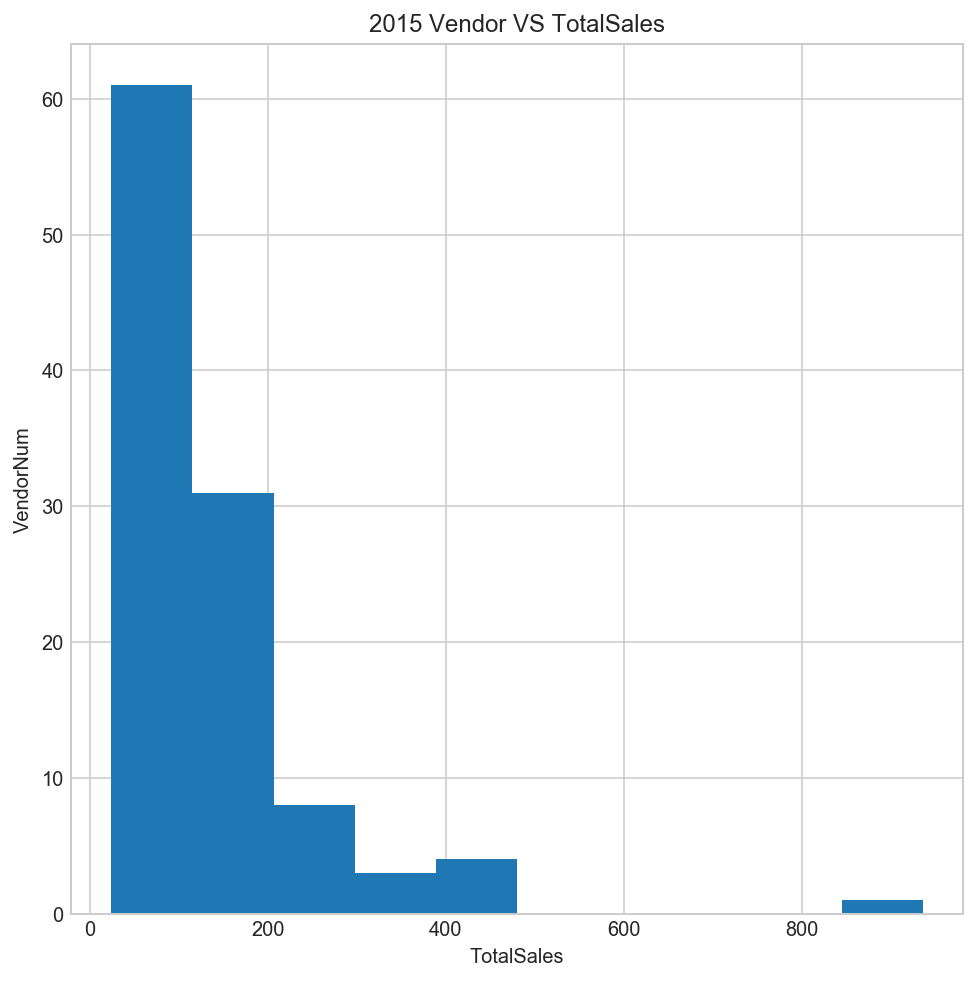

In [85]:
# Plot of Vendors and AVG Total Sales.
fig, ax = plt.subplots(figsize = (8, 8))
df1.groupby('VendorNum')['TotalSales'].mean().sort_values(ascending=False).plot('hist', ax = ax, title = '2015 Vendor VS TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('VendorNum')

Text(0,0.5,'BottlesSold')

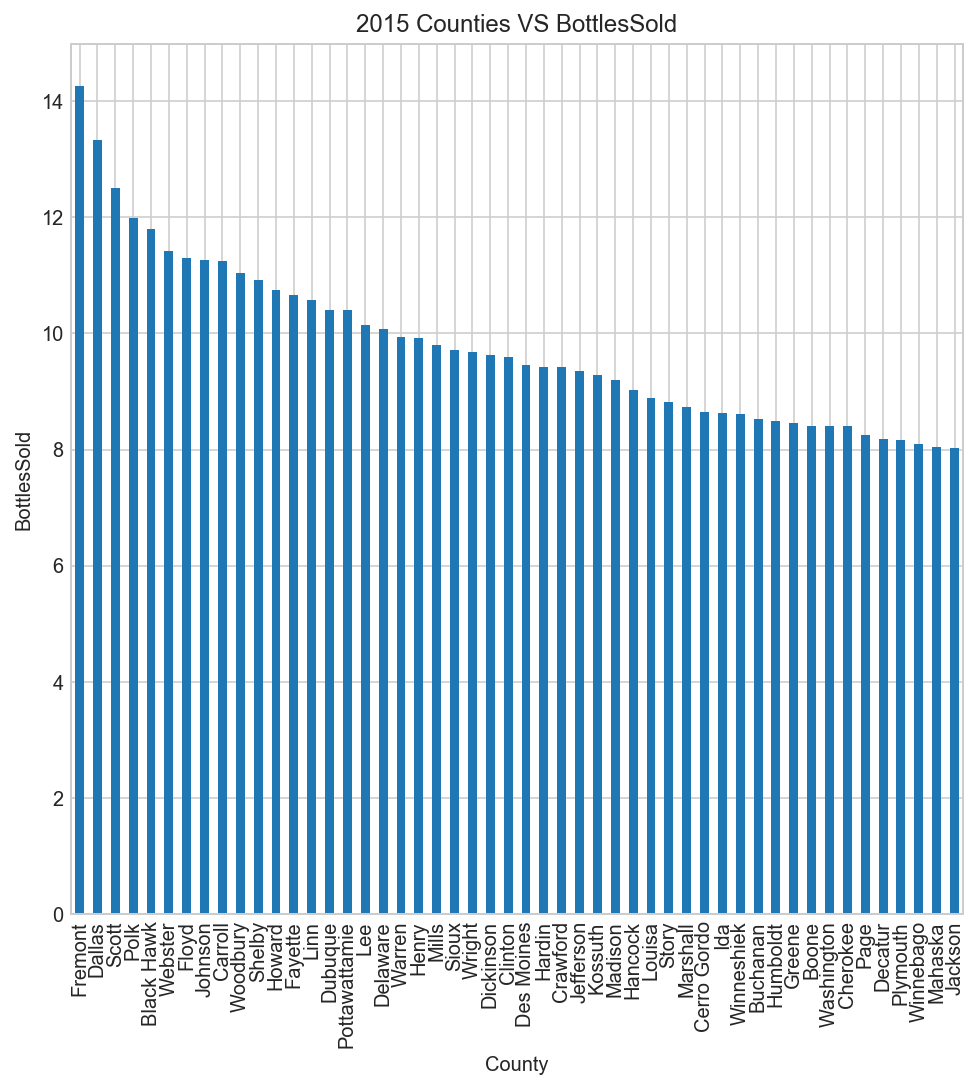

In [86]:
# Plot of Counties and AVG BottlesSold Sales.
fig, ax = plt.subplots(figsize = (8, 8))
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending=False).head(50).plot('bar', ax = ax, title = '2015 Counties VS BottlesSold')
plt.xlabel('County')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

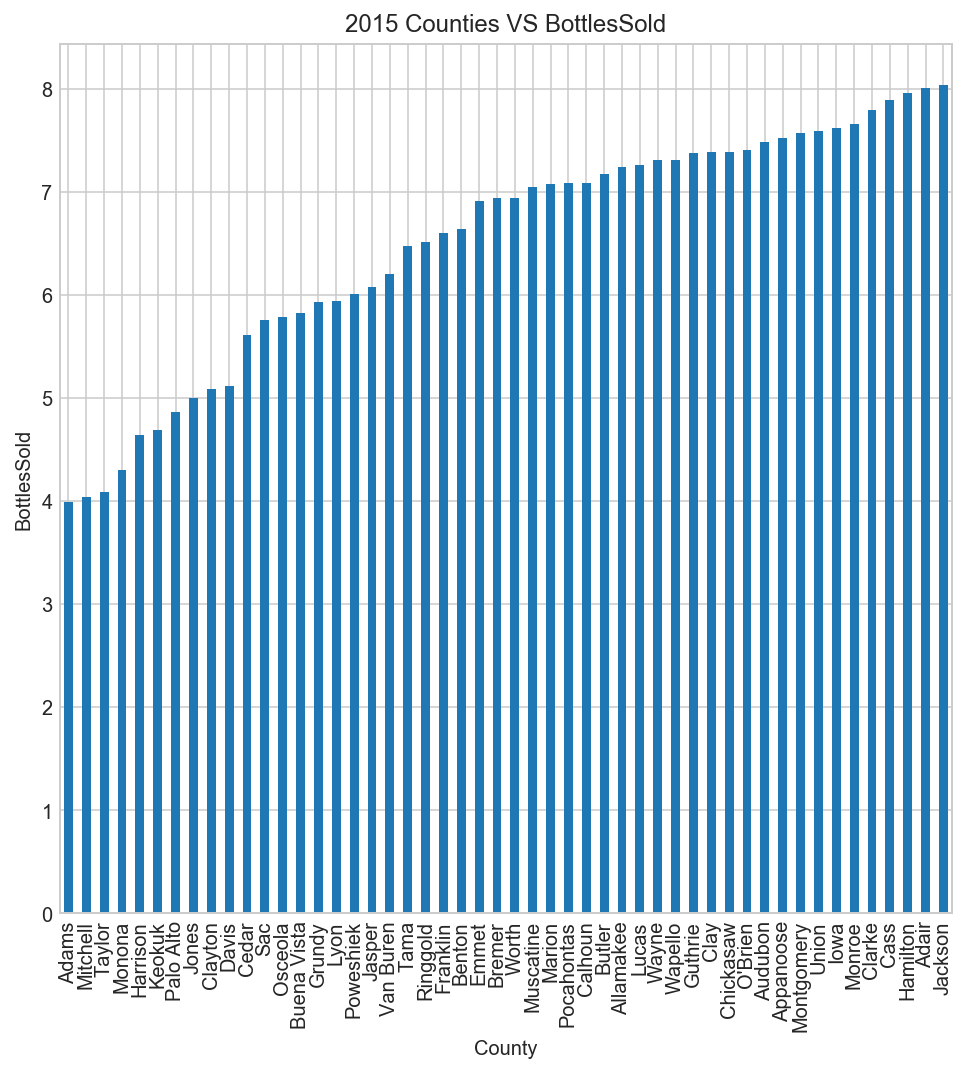

In [87]:
# Plot of Counties and AVG BottlesSold Sales.
fig, ax = plt.subplots(figsize = (8, 8))
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending=True).head(50).plot('bar', ax = ax, title = '2015 Counties VS BottlesSold')
plt.xlabel('County')
plt.ylabel('BottlesSold')

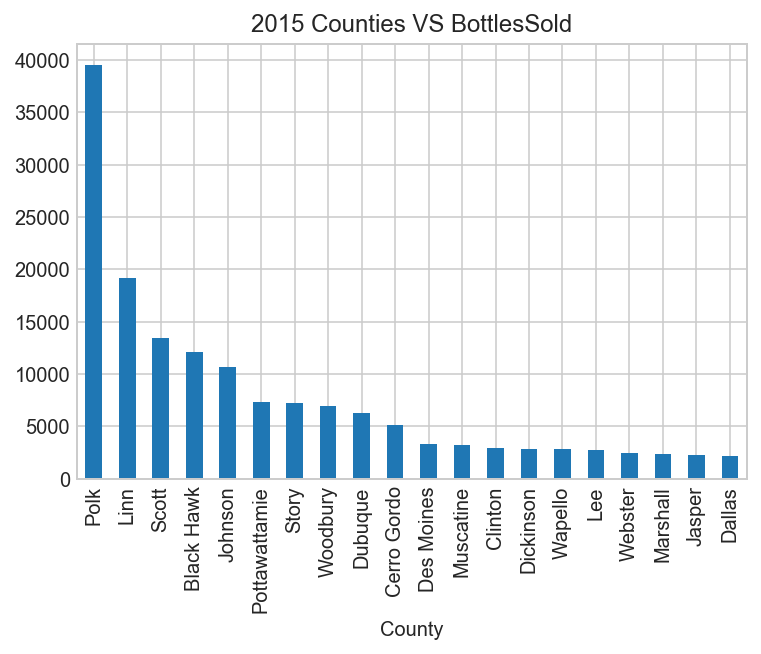

In [88]:
df1.groupby('County')['BottlesSold'].count().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2015 Counties VS BottlesSold')

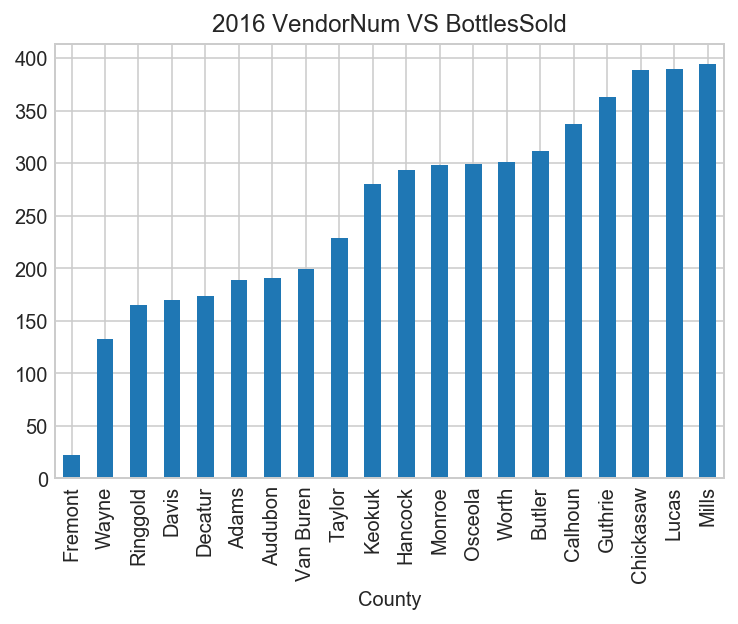

In [89]:
df1.groupby('County')['BottlesSold'].count().sort_values(ascending = True).head(20).plot(kind= 'bar', title='2016 VendorNum VS BottlesSold')

Text(0,0.5,'VendorNum')

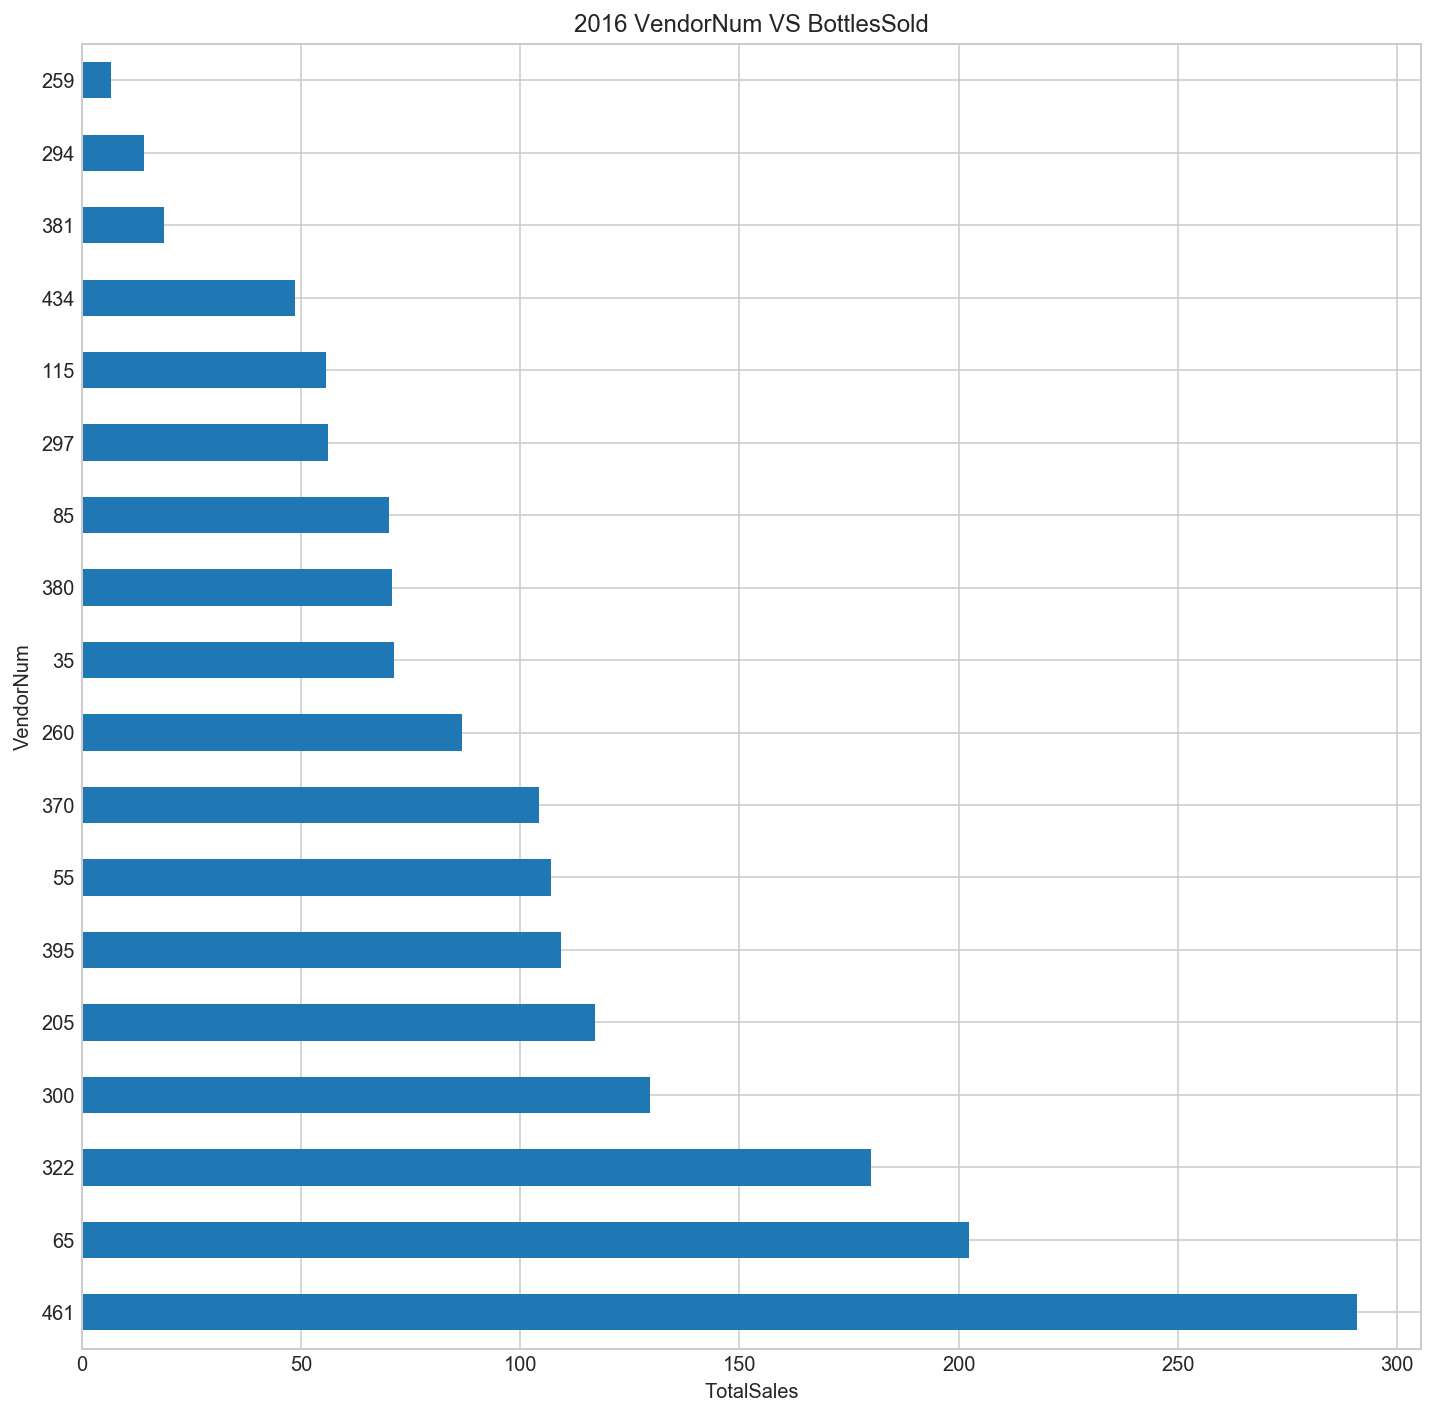

In [90]:
# Bar plot showing VendorNum and TotalSales.
fig, ax = plt.subplots(figsize=(12,12))
df2.iloc[0:50, :].groupby('VendorNum')['TotalSales'].mean().sort_values(ascending=False).plot(kind='barH', ax=ax, title='2016 VendorNum VS BottlesSold')
plt.xlabel('TotalSales')
plt.ylabel('VendorNum')

In [91]:
df1.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(2)

Date
2015-12-01    1555
2015-11-30    1553
Name: TotalSales, dtype: int64

In [92]:
df1.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(2)

Date
2015-06-12    499.68
2015-06-05    476.57
Name: TotalSales, dtype: float64

In [93]:
df2.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(2)

Date
2016-01-04    1311
2016-01-25    1296
Name: TotalSales, dtype: int64

In [94]:
df2.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(2)

Date
2016-03-04    708.240000
2016-01-15    189.833775
Name: TotalSales, dtype: float64

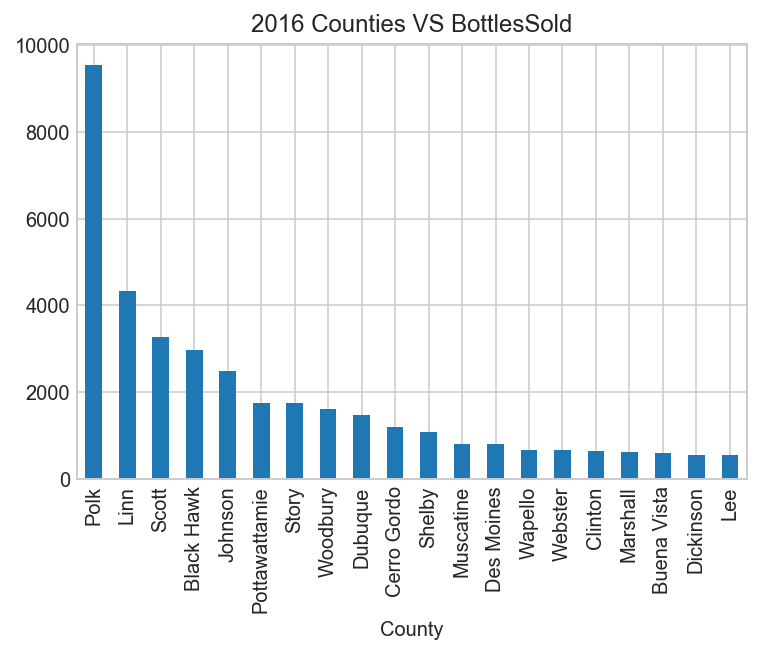

In [95]:
df2.groupby('County')['BottlesSold'].count().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2016 Counties VS BottlesSold')

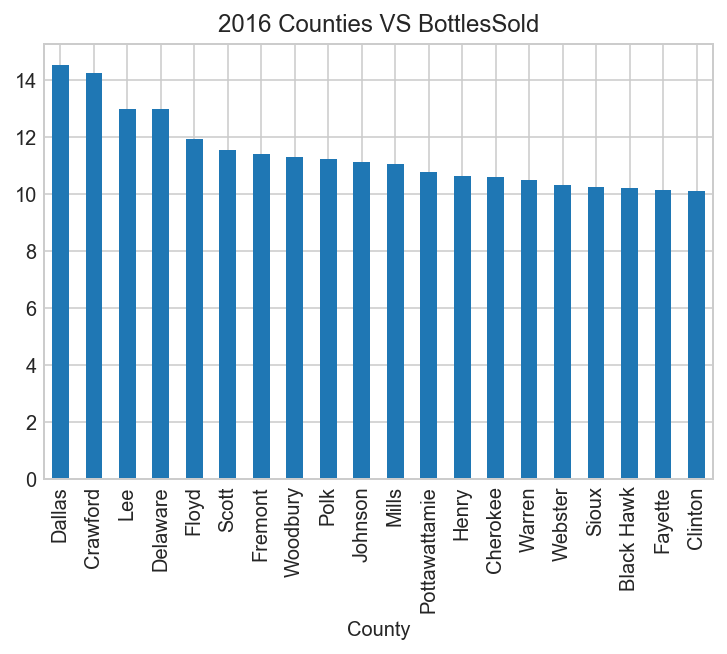

In [96]:
df2.groupby('County')['BottlesSold'].mean().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2016 Counties VS BottlesSold')

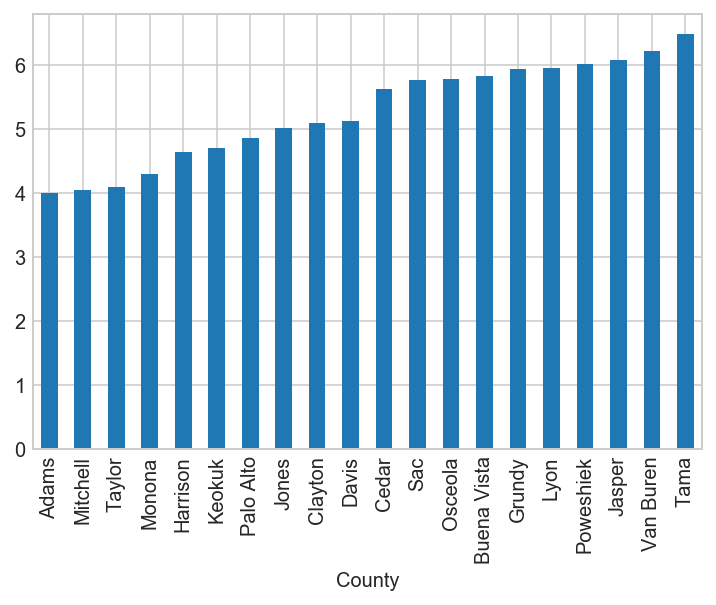

In [97]:
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending = True).head(20).plot(kind= 'bar') # base on avg 2015

Text(0,0.5,'Date')

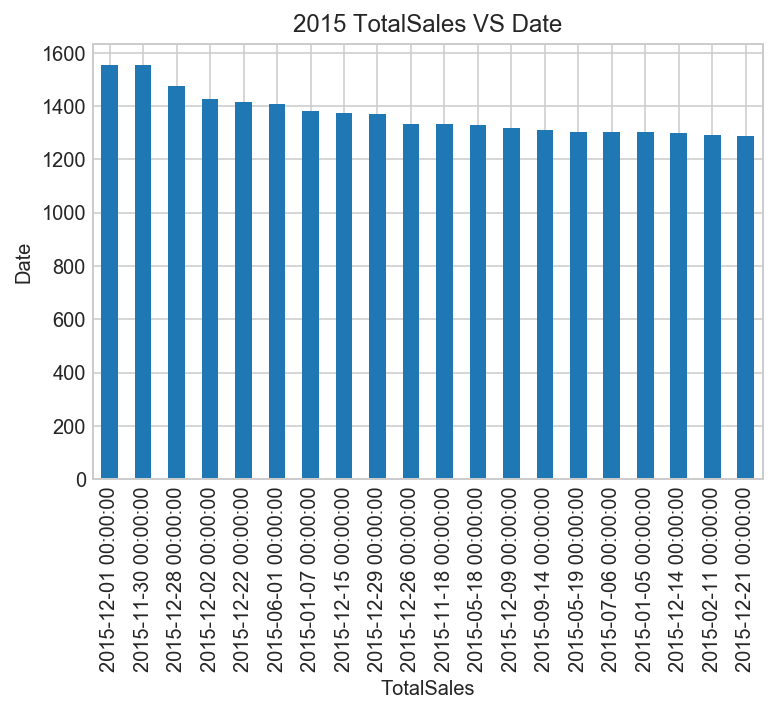

In [98]:
df1.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(20).plot('bar',  title = '2015 TotalSales VS Date')
plt.xlabel('TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('Date')  # Total Sales base on count in 2015

Text(0,0.5,'Date')

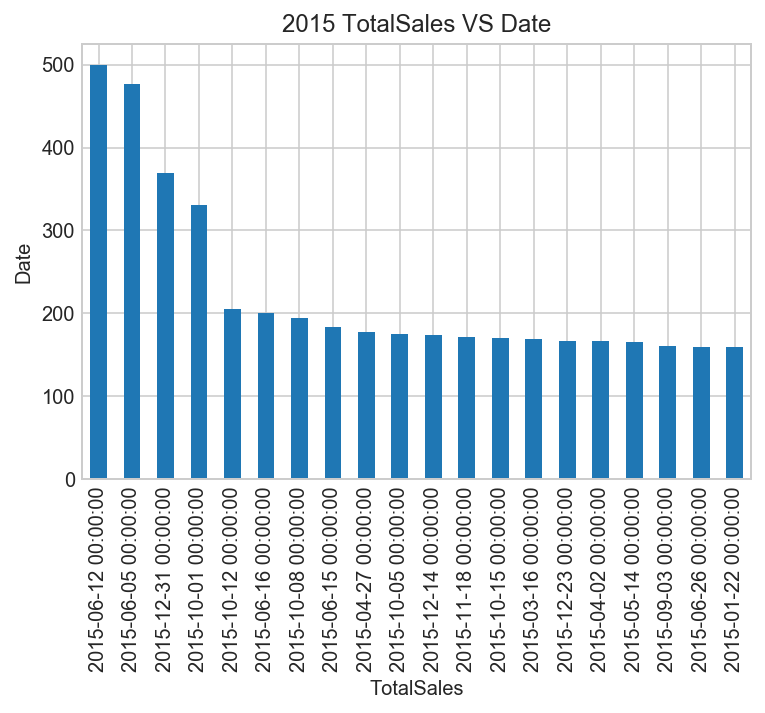

In [99]:
df1.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(20).plot('bar', title = '2015 TotalSales VS Date')
plt.xlabel('TotalSales')
plt.ylabel('Date')  # Total sales based on avg 2015

Text(0,0.5,'BottlesSold')

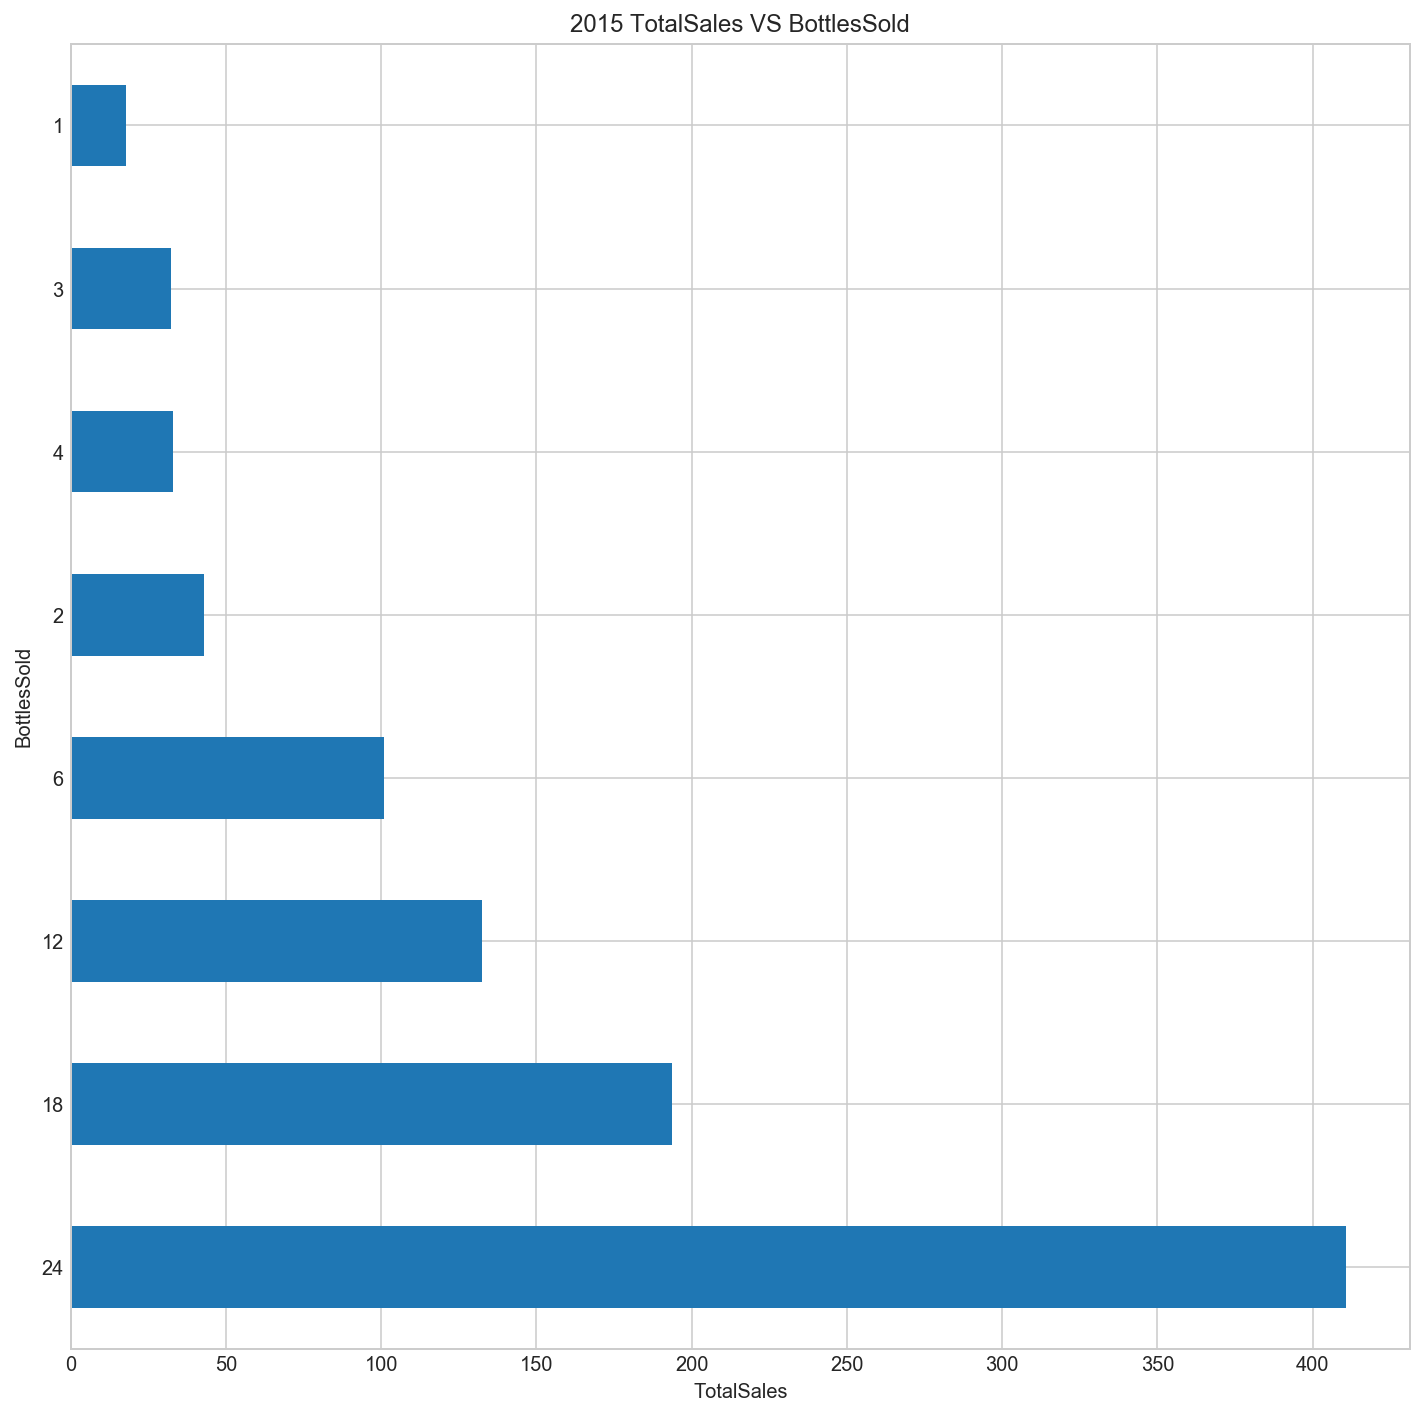

In [100]:
# Bar plot showing BottlesSold and TotalSales.
fig, ax = plt.subplots(figsize=(12,12))
df1.iloc[0:50, :].groupby('BottlesSold')['TotalSales'].mean().sort_values(ascending=False).plot(kind='barH', ax=ax, title='2015 TotalSales VS BottlesSold')
plt.xlabel('TotalSales')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

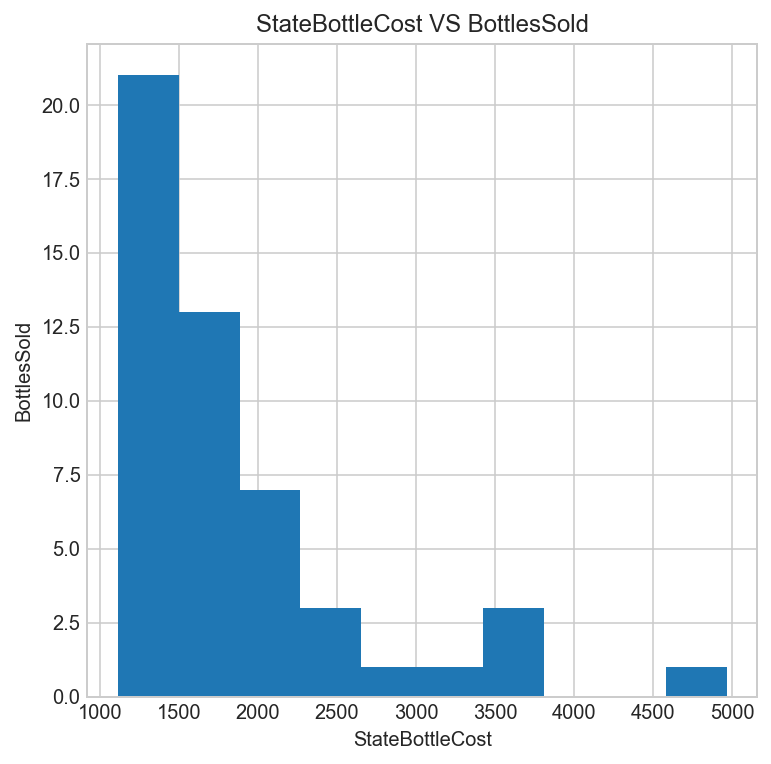

In [101]:
# Horizontal plot of StateBottleCost and BottlesSold observations.
fig, ax = plt.subplots(figsize = (6, 6))
df1.groupby('StateBottleCost')['BottlesSold'].count().sort_values(ascending=False).head(50).plot('hist', ax = ax, title = 'StateBottleCost VS BottlesSold')
plt.xlabel('StateBottleCost')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

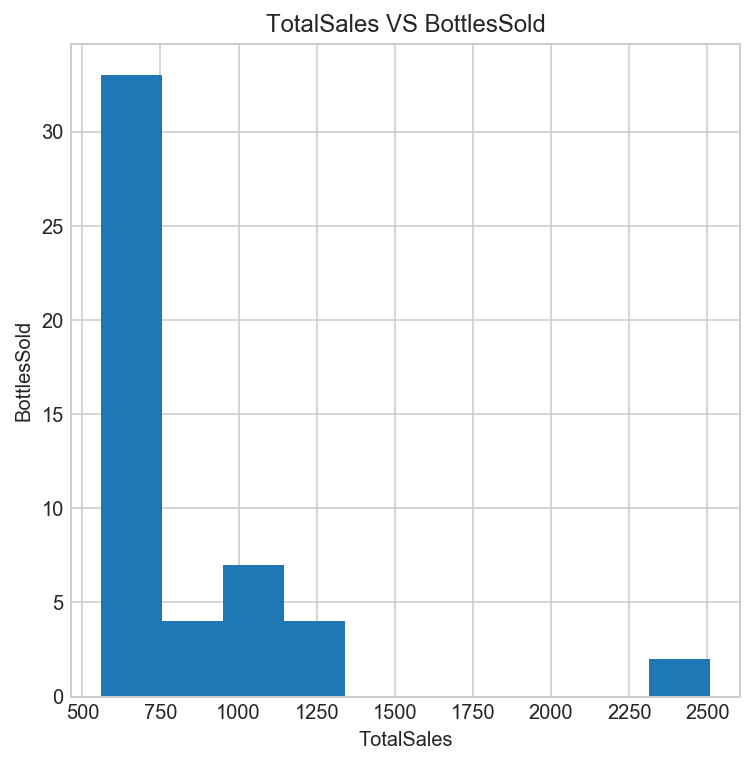

In [102]:
# Horizontal plot of TotalSales Vs BottlesSold observation.
fig, ax = plt.subplots(figsize = (6, 6))
df1.groupby('TotalSales')['BottlesSold'].mean().sort_values(ascending=False).head(50).plot('hist', ax = ax, title = 'TotalSales VS BottlesSold')
plt.xlabel('TotalSales')
plt.ylabel('BottlesSold')

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


1. Total Sales is 36392.40.  I notice vendor with max sales in dollars 36392.40 in dollars also made most profit. sold 1000 in 
   vol of bottle, at 18.38 state bottle cost, state bottle retail, sold 1,320 bottles volumn less, sold in litre is 1320 less,      volumn sold gallons 348.71 less
2. Profit bottle is 12130.80. Taken by no 1
3. max bottle sold is 2508. i noticed that the vendor with max bottle sold made 14947.68 in dollars and profit of 4990.92 in  n   dollars, 662.54 volumn sold gallons, Volumn sold liter, bottle retail 5.96 in dollars  at state bottle cost of 3.97 in dollars   and 1000 in bottle volumn.
4. state bottle cost is 425. i notice that state bottle cost with the higest cost 425 in dollars retailed at 637.50 only was       sold 1 time by a vendor and the volumn in liter is 0.75 and 0.2 in gallons, profit made was 212.5 in dollars. bottle volumn is   750ml. also noticed one vendor made these sales.
5. Bottle Volumn is 6000. i noticed that vendors that sold 6000ml in bottle volumn which is max bottle volumn sold made profit      in dollars of 1237.50, made total sales 3712.50, 25 bottles sold, retailed at 148.50 in dollars, at state cost of 99.0,         volumn in liter is 150.0 volumn in gallons is 39.63.
6. state bottle retail is 637.50. i noticed that retail bottles price at 637.50 in dollars sold only 1 bottle at 637.50 dollars,   state bottle cost at 425 dollars bottle volumn is 750 ml, volumn solad liter is 0.75 and gallons is 0.20 and profit made was     212.50.
7. min bottle sold is 1. i notice that the same least bottle sold also was the least retailed price at 1.34 dollars, at state      cost of 0.89 dollars also the least state bottle cost. but with a volumn of 100ml which is not the least. total sale in          dollars is 1.34 which is also the least total sale but not least profit of 0.45 dollars. looks like one vendor did most of      the sale and the number is 55.
8. min profit bottle is 0.00. i notice that the vondor that did this sold 1 bottle of 600ml at state cost rate of 8.40 dollars      and retailed at 8.40 dollars and since he only sold just one bottle he made no profit. and the vendor number is 35. the item    description is Bonnie Rose(different flavors)

9. min bottle volumn in ml is 50ml. i notice that 50ml is the least bottle ml sold at state cost of 5.77 dollars and retailed at    8.66 dollars, 6 bottles was sold at total of 51.96 dollars and profit made of 17.34 dollars.vendor 885 made majority of the      sales and mostly 6 bottles sold.



# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [103]:
df15 = df1.loc[(df1['Date'] >= '2015-01-01') & (df1['Date'] < '2015-03-31')].copy()  # Split from Jan to March of 2015

In [104]:
df15.head()

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
8,2015-01-22,Scott,CANADIAN WHISKIES,65,8.92,13.38,1,13.38,1.75,4.46
12,2015-03-04,Scott,CANADIAN WHISKIES,434,9.97,14.96,6,89.76,10.50,29.94
13,2015-01-16,Linn,VODKA FLAVORED,971,14.25,21.38,2,42.76,1.50,14.26
14,2015-01-13,Tama,CANADIAN WHISKIES,115,5.23,7.85,12,94.20,9.00,31.44
15,2015-03-24,Sioux,BLENDED WHISKIES,260,7.00,10.50,12,126.00,9.00,42.00


In [105]:
df15.describe()

,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
count,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000
mean,255.753191,9.655163,14.501423,9.548902,123.917826,8.685759,41.460995
std,141.910569,6.913955,10.370613,21.783813,346.678976,26.686943,116.830962
min,10.000000,0.970000,1.460000,1.000000,1.460000,0.100000,0.490000
25%,115.000000,5.500000,8.250000,2.000000,30.390000,1.500000,10.150000
50%,260.000000,7.940000,12.000000,6.000000,69.780000,5.250000,23.280000
75%,380.000000,11.750000,17.630000,12.000000,134.880000,10.500000,45.000000
max,978.000000,425.000000,637.500000,1164.000000,17378.520000,2037.000000,6087.720000


In [106]:
df15 = df15.groupby(['VendorNum','Date','County','VolumeSoldLiters','StateBottleRetail','StateBottleCost','ProfitBottle'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].sum().sort_values(by=['TotalSales'], ascending=False)

In [107]:
df15.head(3) # 2015  from Jan - March best perormed vendor by total sales

,VendorNum,Date,County,VolumeSoldLiters,StateBottleRetail,StateBottleCost,ProfitBottle,BottlesSold,TotalSales
12724,115,2015-02-23,Henry,2037.0,14.93,9.70,6087.72,1164,17378.52
23699,260,2015-02-26,Polk,576.0,27.75,18.50,5328.00,576,15984.00
22609,260,2015-02-16,Pottawattamie,525.0,47.99,31.99,4800.00,300,14397.00


In [108]:
df15.VendorNum.unique()

array([115, 260,  85, 370, 421, 192, 434,  55, 255,  65, 205, 395,  35,
       380, 389, 301, 420, 410, 461, 240, 277, 130, 300, 305, 259, 306,
       297, 154,  86, 125, 330, 381, 497, 322, 492, 267, 246, 287, 478,
       116, 208, 460, 284, 971, 121, 962, 885, 293, 978, 377, 107, 229,
       346, 206, 295, 446, 384, 110,  91, 184, 250, 375, 122, 413, 977,
       239, 224, 268, 394, 451, 432, 969, 101, 357, 452, 308, 399,  10,
       285, 495, 803, 338, 207, 294, 315, 390, 373, 469, 418], dtype=int64)

In [109]:
df16 = df15.drop(['VendorNum','ProfitBottle'], axis = 1)

In [110]:
df16.head()

,Date,County,VolumeSoldLiters,StateBottleRetail,StateBottleCost,BottlesSold,TotalSales
12724,2015-02-23,Henry,2037.0,14.93,9.70,1164,17378.52
23699,2015-02-26,Polk,576.0,27.75,18.50,576,15984.00
22609,2015-02-16,Pottawattamie,525.0,47.99,31.99,300,14397.00
25503,2015-03-18,Woodbury,816.0,17.63,11.75,816,14386.08
10776,2015-03-16,Linn,516.0,26.85,17.90,516,13854.60


In [111]:
df16.isnull().sum()

Date                 0
County               0
VolumeSoldLiters     0
StateBottleRetail    0
StateBottleCost      0
BottlesSold          0
TotalSales           0
dtype: int64

In [112]:
df16.groupby('County')['TotalSales'].count().sort_values(['TotalSales'].count('County'), ascending=False)

County
Polk             7985
Linn             3991
Scott            2796
Black Hawk       2523
Johnson          2226
Pottawattamie    1566
Story            1537
Woodbury         1450
Dubuque          1289
Cerro Gordo      1008
Des Moines        759
Muscatine         707
Clinton           641
Lee               641
Wapello           606
Jasper            523
Webster           521
Dickinson         506
Marshall          489
Dallas            472
Warren            467
Buena Vista       449
Marion            445
Bremer            408
Boone             384
Jones             360
Carroll           344
Poweshiek         325
Jackson           310
Iowa              306
                 ... 
Emmet             133
Clarke            132
Louisa            115
Wright            113
Delaware          113
Adair             106
Ida               102
Grundy            100
Pocahontas         96
Humboldt           96
Lucas              93
Mills              82
Chickasaw          82
Osceola            76
Cal

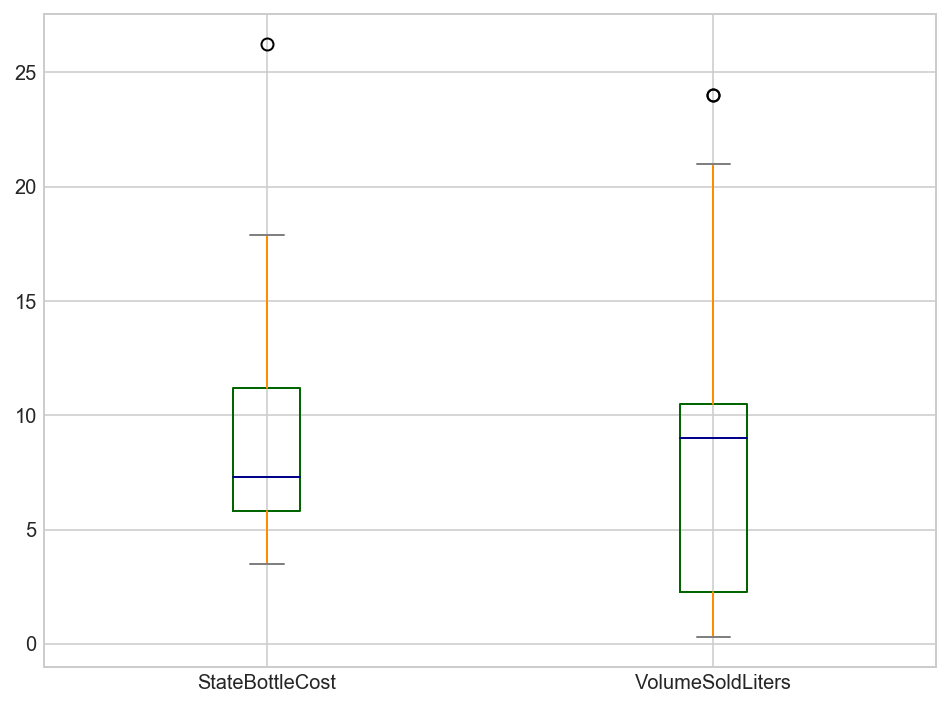

In [113]:
#Plot of StateBottleCost and VolumnSoldLiters on the same boxplot.
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
          medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots(figsize = (8, 6))

df1[['StateBottleCost', 'VolumeSoldLiters']].head(20).plot.box(color = color, ax=ax)

In [114]:
rename_iow3 = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [115]:
iowa.rename(columns=rename_iow3, inplace=True)  # Replacing column names to suitable ones
iowa.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [116]:
null_mask = iowa['TotalSales'] # masking so as to be able to access the variable values and perform string strip
new_null = null_mask.str.strip('$')
new_null = [float(x) for x in new_null]

iowa['TotalSales'] = new_null


In [117]:
null_mask1 = iowa['StateBottleRetail']  # formating to floats from string object
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

iowa['StateBottleRetail'] = new_null1

In [118]:
null_mask2 = iowa['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

iowa['StateBottleCost'] = new_null2

In [119]:
iowa.head()

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [120]:
df01 = iowa[['Date','County','TotalSales','StateBottleCost']]

In [121]:
df01_15 = df01[df01['Date'] < '2016-01-01']
df01_16 = df01[df01['Date'] >= '2016-01-01']

In [122]:
df02 = df01_15

In [123]:
df02.groupby(['Date','County']).sum().head(1)
df2jan = df02[(df02['Date'] >= '2015-01-01') & (df02['Date'] < '2015-02-01')].sort_values('County').groupby('County').sum()
df2jan.columns = ['Jan_TotalSales', 'StateBottleCost']

In [124]:
df2jan.head()

,Jan_TotalSales,StateBottleCost
County,,
Adair,3288.52,352.29
Adams,473.31,120.48
Allamakee,5701.58,559.83
Appanoose,3943.98,445.34
Audubon,1026.95,126.70


In [128]:
df03 = df01_15
df03.groupby(['Date','County']).sum().head(1)
df03feb = df03[(df03['Date'] >= '2015-02-01') & (df03['Date'] < '2015-03-01')].sort_values('County').groupby('County').sum()
df03feb.columns = ['Feb_TotalSales', 'StateBotleCost']

In [129]:
df03.head()

,Date,County,TotalSales,StateBottleCost
0,2015-11-04,Bremer,81.00,4.50
4,2015-08-18,Wright,129.60,7.20
5,2015-04-20,Linn,119.88,13.32
6,2015-08-05,Wapello,29.97,6.66
7,2015-06-25,Cerro Gordo,47.26,15.75


In [130]:
df04 = df01_15
df04.groupby(['Date','County']).sum().head(1)
df4march = df04[(df04['Date'] >= '2015-03-01') & (df04['Date'] < '2015-04-01')].sort_values('County').groupby('County').sum()
df4march.columns = ['March_TotalSale', 'StateBottleCost_1']


In [131]:
df05 = df01_15
df05.groupby(['Date','County']).sum().head(1)
df03 = df03.reset_index()
df5dec = df05[(df05['Date'] >= '2015-12-01') & (df05['Date'] < '2016-01-01')].sort_values('County').groupby('County').sum()
df5dec.columns = ['Total_yr','StateBottleCost_2']


In [132]:
df1_final = pd.concat([df2jan, df03feb, df4march, df5dec], axis = 1)
df1_final = df1_final.reset_index()
df1_final.head()

,index,Jan_TotalSales,StateBottleCost,Feb_TotalSales,StateBotleCost,March_TotalSale,StateBottleCost,Total_yr,StateBottleCost
0,Adair,3288.52,352.29,3659.62,260.89,3273.86,352.95,4334.71,489.54
1,Adams,473.31,120.48,537.34,100.26,1242.95,208.72,1392.41,331.80
2,Allamakee,5701.58,559.83,5040.82,392.02,4165.58,384.27,10191.60,1060.87
3,Appanoose,3943.98,445.34,6377.56,668.60,4906.55,452.17,7697.33,832.85
4,Audubon,1026.95,126.70,2998.20,153.66,1485.60,249.00,2637.47,145.11


In [133]:
df1_final.dtypes

index               object
Jan_TotalSales     float64
StateBottleCost    float64
Feb_TotalSales     float64
StateBotleCost     float64
March_TotalSale    float64
StateBottleCost    float64
Total_yr           float64
StateBottleCost    float64
dtype: object

In [134]:
df1_final['StateBottleCost1'] = df1_final[['StateBottleCost','StateBotleCost','StateBottleCost','StateBottleCost']].sum(axis=1)

In [135]:
df1_final['StateBottleCost1']  = df1_final

In [136]:
df1_final.head()

,index,Jan_TotalSales,StateBottleCost,Feb_TotalSales,StateBotleCost,March_TotalSale,StateBottleCost,Total_yr,StateBottleCost,StateBottleCost1
0,Adair,3288.52,352.29,3659.62,260.89,3273.86,352.95,4334.71,489.54,Adair
1,Adams,473.31,120.48,537.34,100.26,1242.95,208.72,1392.41,331.80,Adams
2,Allamakee,5701.58,559.83,5040.82,392.02,4165.58,384.27,10191.60,1060.87,Allamakee
3,Appanoose,3943.98,445.34,6377.56,668.60,4906.55,452.17,7697.33,832.85,Appanoose
4,Audubon,1026.95,126.70,2998.20,153.66,1485.60,249.00,2637.47,145.11,Audubon


In [138]:
df1_final.drop(['StateBotleCost','StateBottleCost1'], axis = 1)

,index,Jan_TotalSales,StateBottleCost,Feb_TotalSales,March_TotalSale,StateBottleCost,Total_yr,StateBottleCost
0,Adair,3288.52,352.29,3659.62,3273.86,352.95,4334.71,489.54
1,Adams,473.31,120.48,537.34,1242.95,208.72,1392.41,331.80
2,Allamakee,5701.58,559.83,5040.82,4165.58,384.27,10191.60,1060.87
3,Appanoose,3943.98,445.34,6377.56,4906.55,452.17,7697.33,832.85
4,Audubon,1026.95,126.70,2998.20,1485.60,249.00,2637.47,145.11
5,Benton,3814.48,461.41,3530.14,7517.65,701.62,8905.56,884.48
6,Black Hawk,92212.03,8036.31,121687.57,126967.48,8427.13,157628.73,12276.22
7,Boone,11685.57,1216.24,24649.12,9871.18,931.17,24943.13,2095.66
8,Bremer,9684.76,1276.25,13804.71,17327.07,1757.61,16125.58,1997.85
9,Buchanan,10080.42,852.47,6931.54,12906.36,1136.30,12169.50,1109.82


In [ ]:
df1_final.head()

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [ ]:
df1_final.isnull().sum()

In [ ]:
null_fed_mask = df1_final['Feb'].isnull()
df1_final.loc[null_fed_mask, 'Feb'] = 0

In [ ]:
# A:
mean_corr = df1_final.corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation = 30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation = 0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
df1_final.corr()

In [ ]:
df1_final.describe()

In [ ]:
df1_final.Total_yr.head(40).hist(bins=10)  # Likely target variable.

In [ ]:
df1_final.Total_yr.describe()

In [ ]:
df1_final.sort_values('Total_yr', ascending=False).head()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import patsy

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [ ]:
X = df1_final[['Jan','Feb','March']]  # First model
y = df1_final.Total_yr  # y is my target variable

In [ ]:
# sklearn automaticaly adds the intercept (beta_0) but stats learn dont so i added a constant
import statsmodels.api as sm

X = df1_final[['Jan','Feb','March']].values
# manually add the intercept column
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = df1_final.Total_yr

In [ ]:
model = sm.OLS(y, X)  # OLS stands for ordinary least squares = linear regression
model = model.fit()
                      # this is our model

In [ ]:
model.summary()

In [ ]:
X1 = df1_final[['Jan','Feb']].values   # second model
X1 = np.concatenate([X1, np.ones((X1.shape[0], 1))], axis=1)
y1 = df1_final.Total_yr

# optionally, you can chain "fit()" to the model object
model = sm.OLS(y1, X1)
model = model.fit()
pred = model.predict(X1)

model.summary()

In [ ]:
pred[0:5]

In [ ]:
lm = linear_model.LinearRegression()  # A linear model with three predictor  

X2 = df1_final[['Jan','Feb','March']].values  # Third model
y2 = df1_final.Total_yr 

model = lm.fit(X2, y2)

preds  =  model.predict(X2)
score        =  model.score(X2, y2)


In [ ]:
print("score: ", score)

In [ ]:
preds[0:5]

In [ ]:
print(model.coef_)

In [ ]:
X3 = df1_final[['Jan','Feb','March']]  # A linear Regression model with three predictor

y3 = df1_final.Total_yr    # Fourth model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred = slr.predict(X_test)

In [ ]:
slr.score(X_test, y_test)

In [ ]:
y_pred[0:5]

In [ ]:
print(model.coef_)

In [ ]:
slr.score(X_train, y_train)

In [ ]:
X4 = df1_final[['Jan','Feb','March']]   # A cross validation with five fold split modeling 

y4 = df1_final.Total_yr   # Fift model

In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform cross-validation with a five-fold split.
scores = cross_val_score(slr, X4, y4, cv=5)
print("Cross-validated scores:", scores)

# Make cross-validated predictions on the testing sets.
predictions = cross_val_predict(slr, X4, y4, cv=5)
plt.scatter(y4, predictions)
plt.title('Total_yr VS Preiction')

# Manually calculate the R2.
r2 = metrics.r2_score(y, predictions)
print("Cross-Predicted R2:", r2)

In [ ]:
# For a 1-unit increase in VolumeSoldLiters (holding constant BottlesSold), there is a 5.83 increase in Total Sales
# For a 1-unit increase in BottlesSold (holding constant VolumeSoldLiters), there is a 7.32 increase in Total Sales

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [ ]:
# Plot the model
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(8,6))
plt.scatter(predictions[0:500], y[0:500], s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.title('Prediction VS Total_yr')
plt.show()

print("MSE:", mean_squared_error(y, predictions))

In [ ]:
plt.figure(figsize=(8,6))   # 2nd model plot
plt.scatter(pred[0:100], y1[0:100], s=30, c='r', marker='+', zorder=10)
plt.title('Prediction VS Total_yr')
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [ ]:
# Plot the model
plt.figure(figsize=(8,8))   # Third model plot
plt.scatter(preds[0:100], y2[0:100], s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values -$\hat{y}$")
plt.ylabel("Actual Values -y")
plt.title('Total_yr VS Prediction')

plt.show()

print("score: ", score)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total_yr VS Prediction')

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.